# Neural Networks Crash Tutorial - Keras version

## Classifying images with Neural Networks

This notebook is inspired by lots of tutorials on the web. It's first part uses the same data and shares the same objectives as with:

https://www.datacamp.com/community/tutorials/tensorflow-tutorial

The data necessary to run this notebook can be downloaded from:

http://btsd.ethz.ch/shareddata/

Look for the two zip files, `BelgiumTSC_Training.zip` and `BelgiumTSC_Testing.zip` in the section **Anotations** next to the label "BelgiumTS for Classification (cropped images)".

You will need [jupyter notebook](http://jupyter.org/install.html) and  [tensorflow](https://www.tensorflow.org) to be installed. You will also need the following packages:

* numpy
* scipy
* matplotlib
* scikit-image
* keras

Most if not all of these packages may already be installed for you.

### Preliminaries
Here are some useful functions:

In [5]:
import os, skimage.data

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [6]:
def plot_images(images, labels, color_map = "brg"):
    # Get the unique labels 
    unique_labels = set(labels)

    # Initialize the figure
    plt.figure(figsize=(15, 15))

    # Set a counter
    i = 1

    # For each unique label,
    for label in unique_labels:
        # You pick the first image for each label
        image = images[labels.index(label)]
        # Define 64 subplots 
        plt.subplot(8, 8, i)
        # Don't include axes
        plt.axis('off')
        # Add a title to each subplot 
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        # Add 1 to the counter
        i += 1
        # And you plot this first image 
        plt.imshow(image, cmap=color_map)
    
    # Show the plot
    plt.show()

### Load training data

In [7]:
train_data_directory = "./BelgiumTrafficSigns/Training"
images, labels = load_data(train_data_directory)

Plot histogram of labels to see how the images are distributed

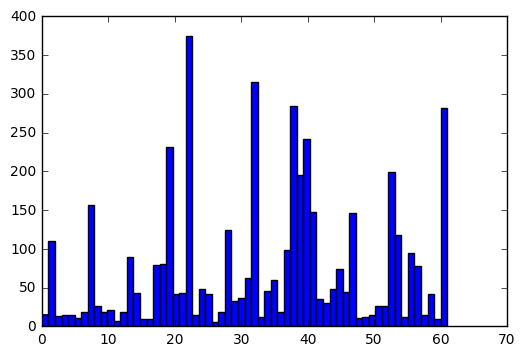

In [8]:
# Import the `pyplot` module of matplotlib
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

Check out some random images and their shapes:

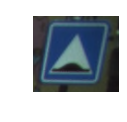

shape: (84, 93, 3)


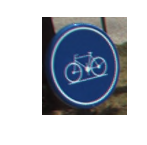

shape: (145, 124, 3)


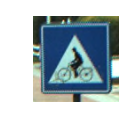

shape: (99, 97, 3)


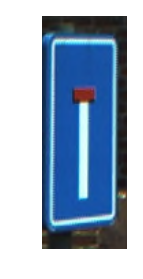

shape: (171, 62, 3)


In [9]:
import random

# Determine the (random) indexes of the images that you want to see 
traffic_signs = random.sample(range(len(images)), 4)

# Fill out the subplots with the random images and add shape
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}".format(images[traffic_signs[i]].shape))

Plot first sample from each category:

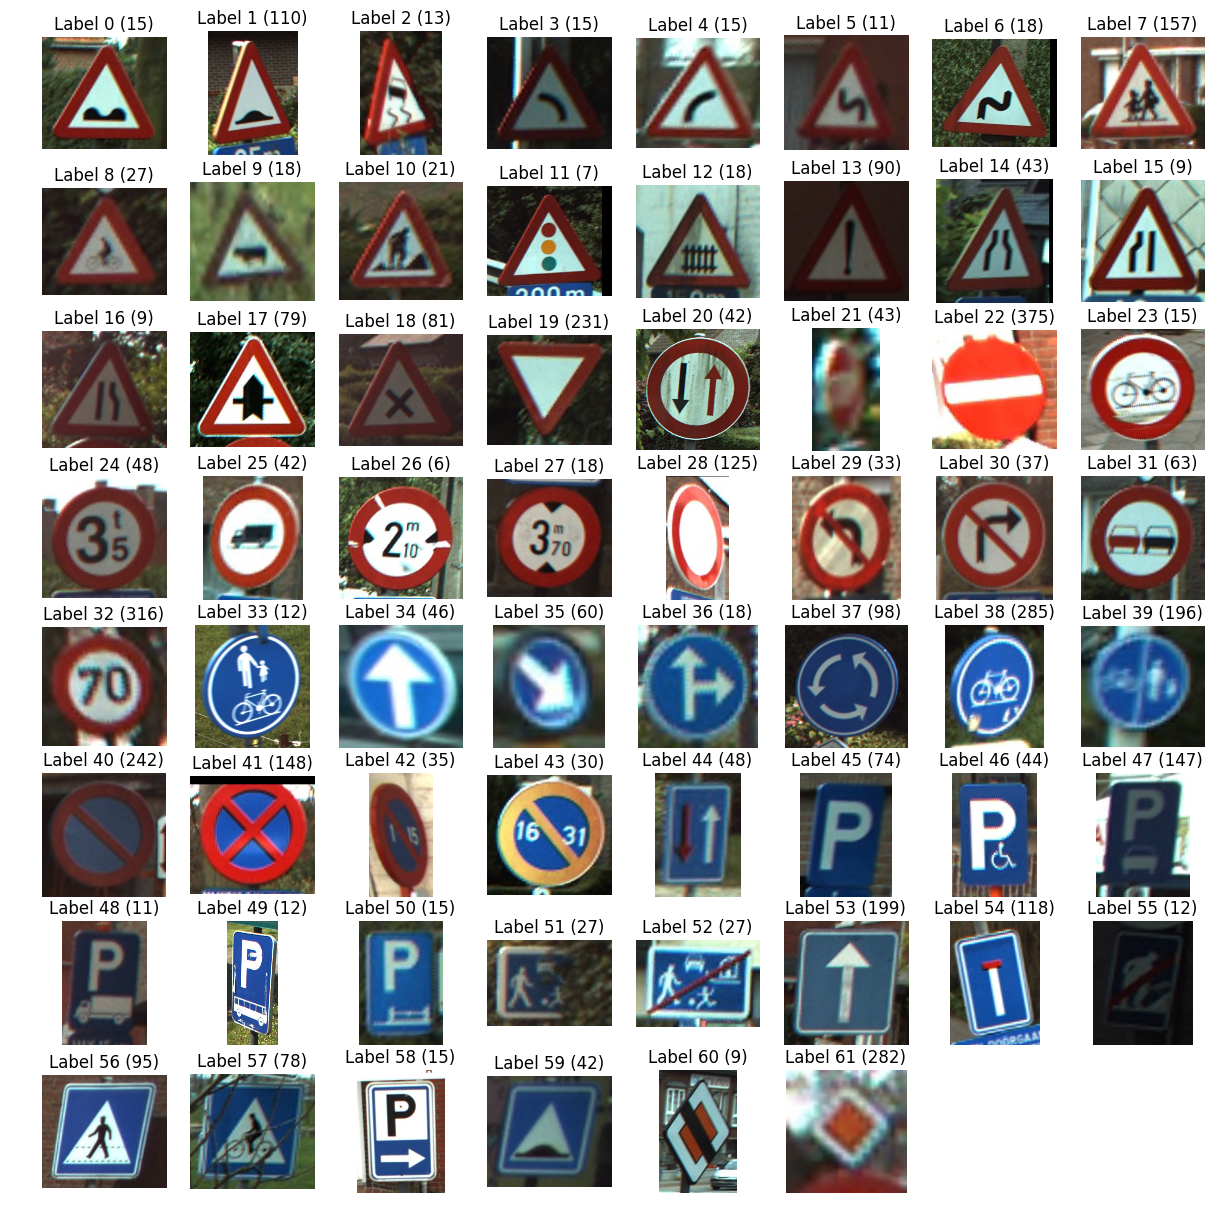

In [10]:
plot_images(images,labels)

### Pre-process images
Make images all the same size and resolution

In [11]:
# Import the `transform` module from `skimage`
from skimage import transform 

# set desired number of pixels
px = 32

# Rescale the images in the `images` array
simages = [transform.resize(image, (px, px), mode='constant') for image in images]

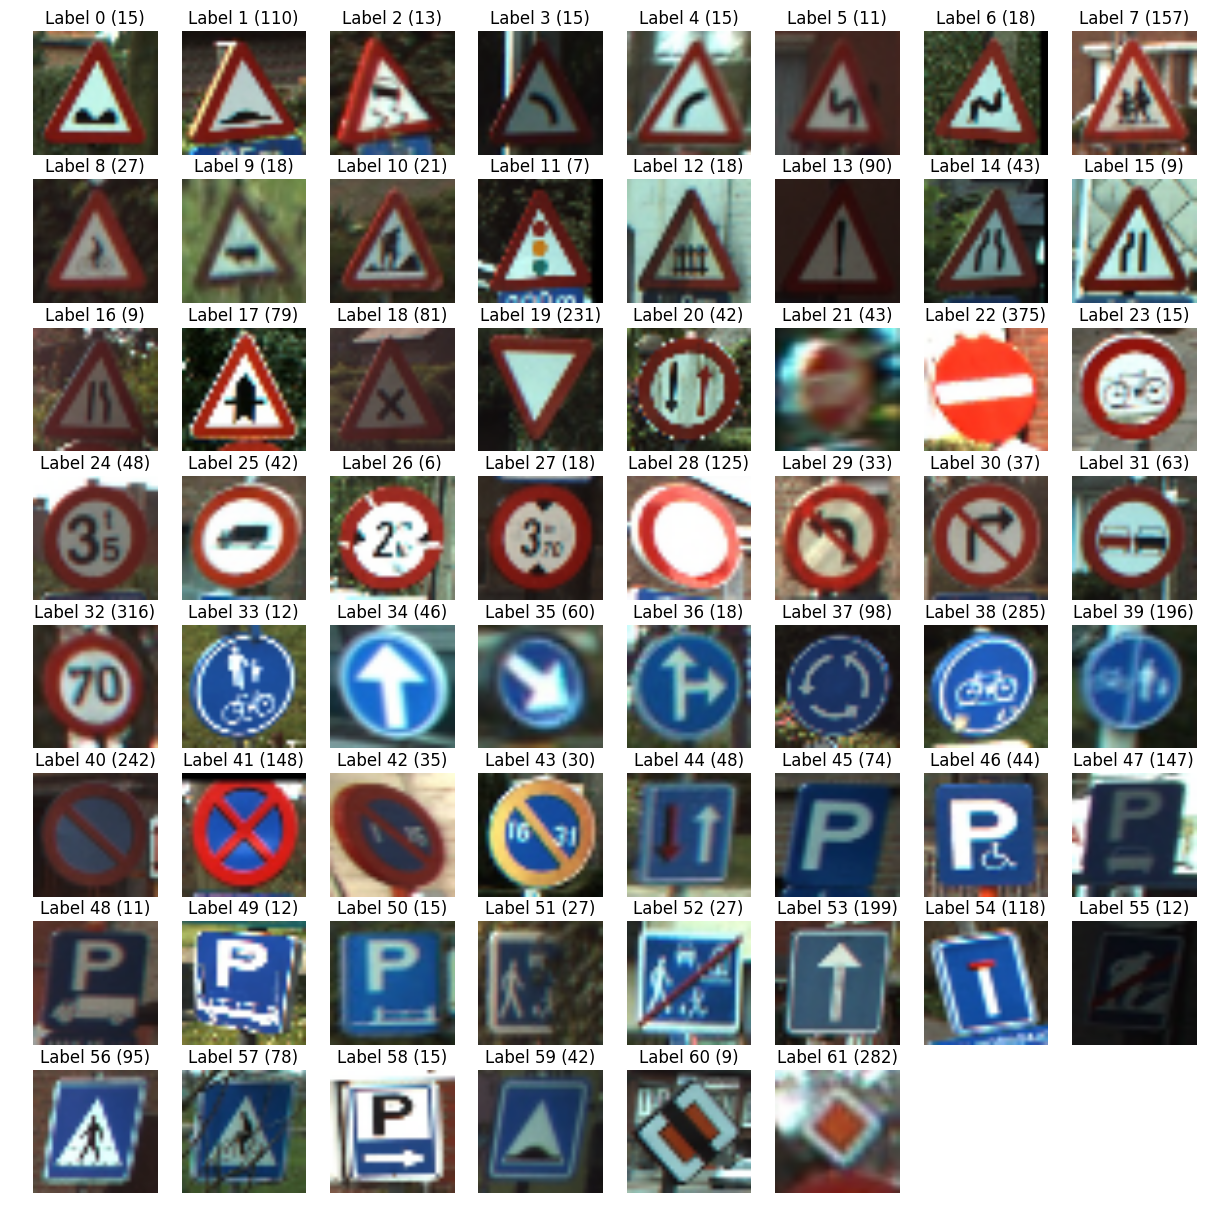

In [12]:
plot_images(simages,labels)

Convert images to gray-scale:

In [13]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `simages` to grayscale
simagesg = [rgb2gray(img) for img in simages]

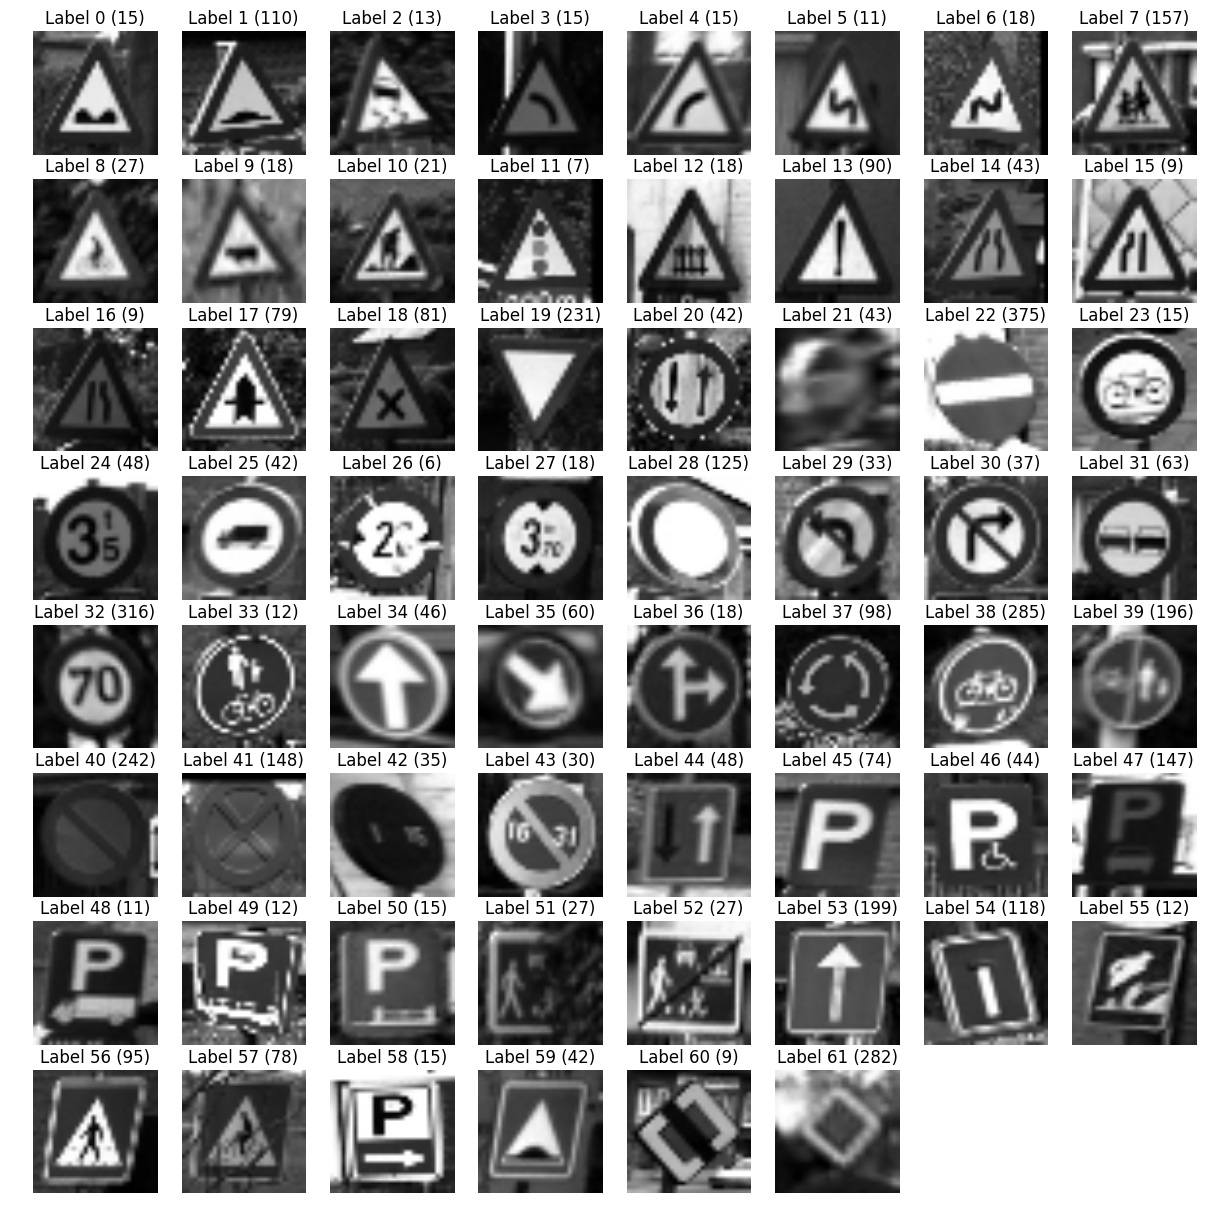

In [14]:
plot_images(simagesg, labels, color_map="gray")

In [15]:
# Compare image sizes
print('original = {}, scaled = {}, grayscale = {}'.format(images[0].shape,simages[0].shape,simagesg[0].shape))

original = (57, 64, 3), scaled = (32, 32, 3), grayscale = (32, 32)


### Create the neural network model

In [17]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.5/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.5/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: libcusolver.so.8.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [18]:
import numpy as np

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=62)

# Convert images to numpy arrays
data = np.array(simagesg)

data.shape

NameError: name 'keras' is not defined

In [14]:
gmodel = Sequential()

gmodel.add(Flatten(input_shape=data.shape[1:]))
gmodel.add(Dense(62, activation='relu'))
gmodel.add(Dropout(0.5))
gmodel.add(Dense(62, activation='softmax'))

### Train the model

In [15]:
# Multi-class classification problem
gmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model, iterating on the data in batches of 32 samples
gmodel.fit(data, one_hot_labels, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4575/4575 [==============================] - 1s - loss: 3.5680 - acc: 0.1521     
Epoch 2/10
4575/4575 [==============================] - 0s - loss: 2.9333 - acc: 0.2927     
Epoch 3/10
4575/4575 [==============================] - 0s - loss: 2.5660 - acc: 0.3576     
Epoch 4/10
4575/4575 [==============================] - 0s - loss: 2.3473 - acc: 0.4072     
Epoch 5/10
4575/4575 [==============================] - 0s - loss: 2.1509 - acc: 0.4516     
Epoch 6/10
4575/4575 [==============================] - 0s - loss: 1.9887 - acc: 0.4682     
Epoch 7/10
4575/4575 [==============================] - 0s - loss: 1.9346 - acc: 0.4859     
Epoch 8/10
4575/4575 [==============================] - 0s - loss: 1.8230 - acc: 0.5001     
Epoch 9/10
4575/4575 [==============================] - 0s - loss: 1.7262 - acc: 0.5233     
Epoch 10/10
4575/4575 [==============================] - 0s - loss: 1.6725 - acc: 0.5445     


### Evaluate performance on some samples
The goal here is to quickly assess if training worked.

A thorough model validation requires much more than simply evaluating some samples from the training data set.

In [17]:
N = 10
sample_indexes = random.sample(range(len(data)), N)
sample_images = np.array([data[i] for i in sample_indexes])
sample_labels = np.array([labels[i] for i in sample_indexes])

# Run the "correct_pred" operation
predicted = np.array(gmodel.predict_classes(sample_images))
      
error, = np.nonzero(sample_labels - predicted)
accuracy = 100*(1-error.size/N)
    
# Print the real and predicted labels
print("Truth:    ", sample_labels)
print("Predicted:", predicted, "accuracy = {}%".format(accuracy))

10/10 [==============================] - 0s
Truth:     [45 54 32 22 52 22 25 17 18 35]
Predicted: [45 54 32 22 52 22 25  7 56 22] accuracy = 70.0%


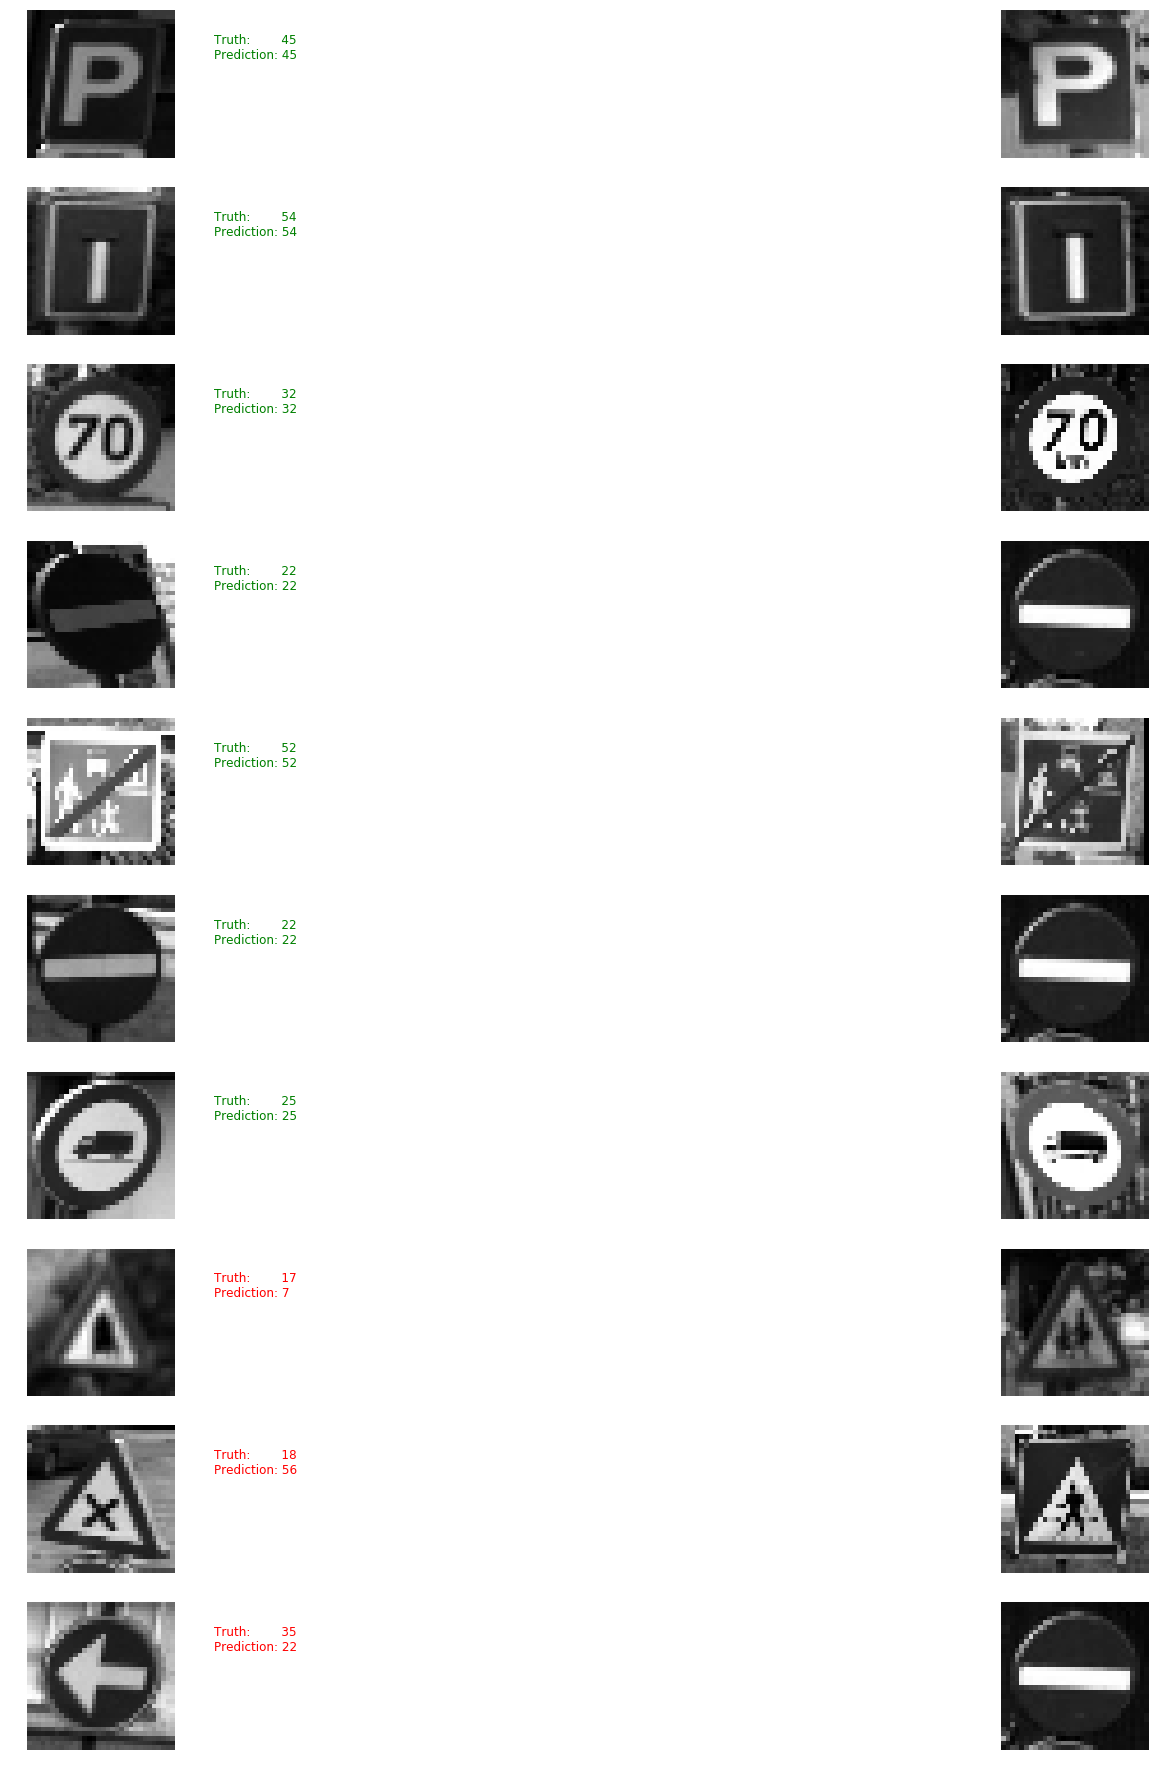

In [18]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(px, px))
j = 1
for i in range(len(sample_images)):
    
    truth = sample_labels[i]
    prediction = predicted[i]
    
    predicted_image = data[labels.index(prediction)]

    plt.subplot(10, 2, j)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap="gray")

    j += 1
    
    plt.subplot(10, 2, j)
    plt.axis('off')
    plt.imshow(predicted_image, cmap="gray")

    j += 1
    
# Show the plot
plt.show()

### Can color improve the results?
You will now repeat the process, this time using color images.

In [19]:
import numpy as np

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=62)

# Convert images to numpy arrays
data = np.array(simages)

data.shape

(4575, 32, 32, 3)

In [20]:
cmodel = Sequential()

cmodel.add(Flatten(input_shape=data.shape[1:]))
cmodel.add(Dense(62, activation='relu'))
cmodel.add(Dropout(0.5))
cmodel.add(Dense(62, activation='softmax'))

### Train the model

In [21]:
# Multi-class classification problem
cmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
# Train the model, iterating on the data in batches of 32 samples
cmodel.fit(data, one_hot_labels, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4575/4575 [==============================] - 1s - loss: 3.4957 - acc: 0.1677     
Epoch 2/10
4575/4575 [==============================] - 1s - loss: 2.9393 - acc: 0.2505     
Epoch 3/10
4575/4575 [==============================] - 1s - loss: 2.6539 - acc: 0.3067     
Epoch 4/10
4575/4575 [==============================] - 1s - loss: 2.4954 - acc: 0.3357     
Epoch 5/10
4575/4575 [==============================] - 1s - loss: 2.3408 - acc: 0.3576     
Epoch 6/10
4575/4575 [==============================] - 1s - loss: 2.3164 - acc: 0.3583     - ETA: 0s - loss:
Epoch 7/10
4575/4575 [==============================] - 1s - loss: 2.2145 - acc: 0.3646     
Epoch 8/10
4575/4575 [==============================] - 1s - loss: 2.1587 - acc: 0.3707     
Epoch 9/10
4575/4575 [==============================] - 1s - loss: 2.0854 - acc: 0.3803     
Epoch 10/10
4575/4575 [==============================] - 1s - loss: 2.0825 - acc: 0.3864     


### Evaluate performance on some samples

In [23]:
N = 10
sample_indexes = random.sample(range(len(data)), N)
sample_gimages = np.array([simagesg[i] for i in sample_indexes])
sample_cimages = np.array([simages[i] for i in sample_indexes])
sample_labels = np.array([labels[i] for i in sample_indexes])

# Run the "correct_pred" operation
gpredicted = gmodel.predict_classes(sample_gimages)
cpredicted = cmodel.predict_classes(sample_cimages)

gerror, = np.nonzero(sample_labels - gpredicted)
cerror, = np.nonzero(sample_labels - cpredicted)

gaccuracy = 100*(1-gerror.size/N)
caccuracy = 100*(1-cerror.size/N)
    
# Print the real and predicted labels
print("Truth:", sample_labels)
print("GS:   ", gpredicted, "accuracy = {}%".format(gaccuracy))
print("Color:", cpredicted, "accuracy = {}%".format(caccuracy))

10/10 [==============================] - 0s
Truth: [59 54  6 21 41 40 53 38 32 57]
GS:    [ 1 54  7 22 40 40 53 38 32 57] accuracy = 60.0%
Color: [59 54  7 22 40 40 53 38 32 57] accuracy = 70.0%


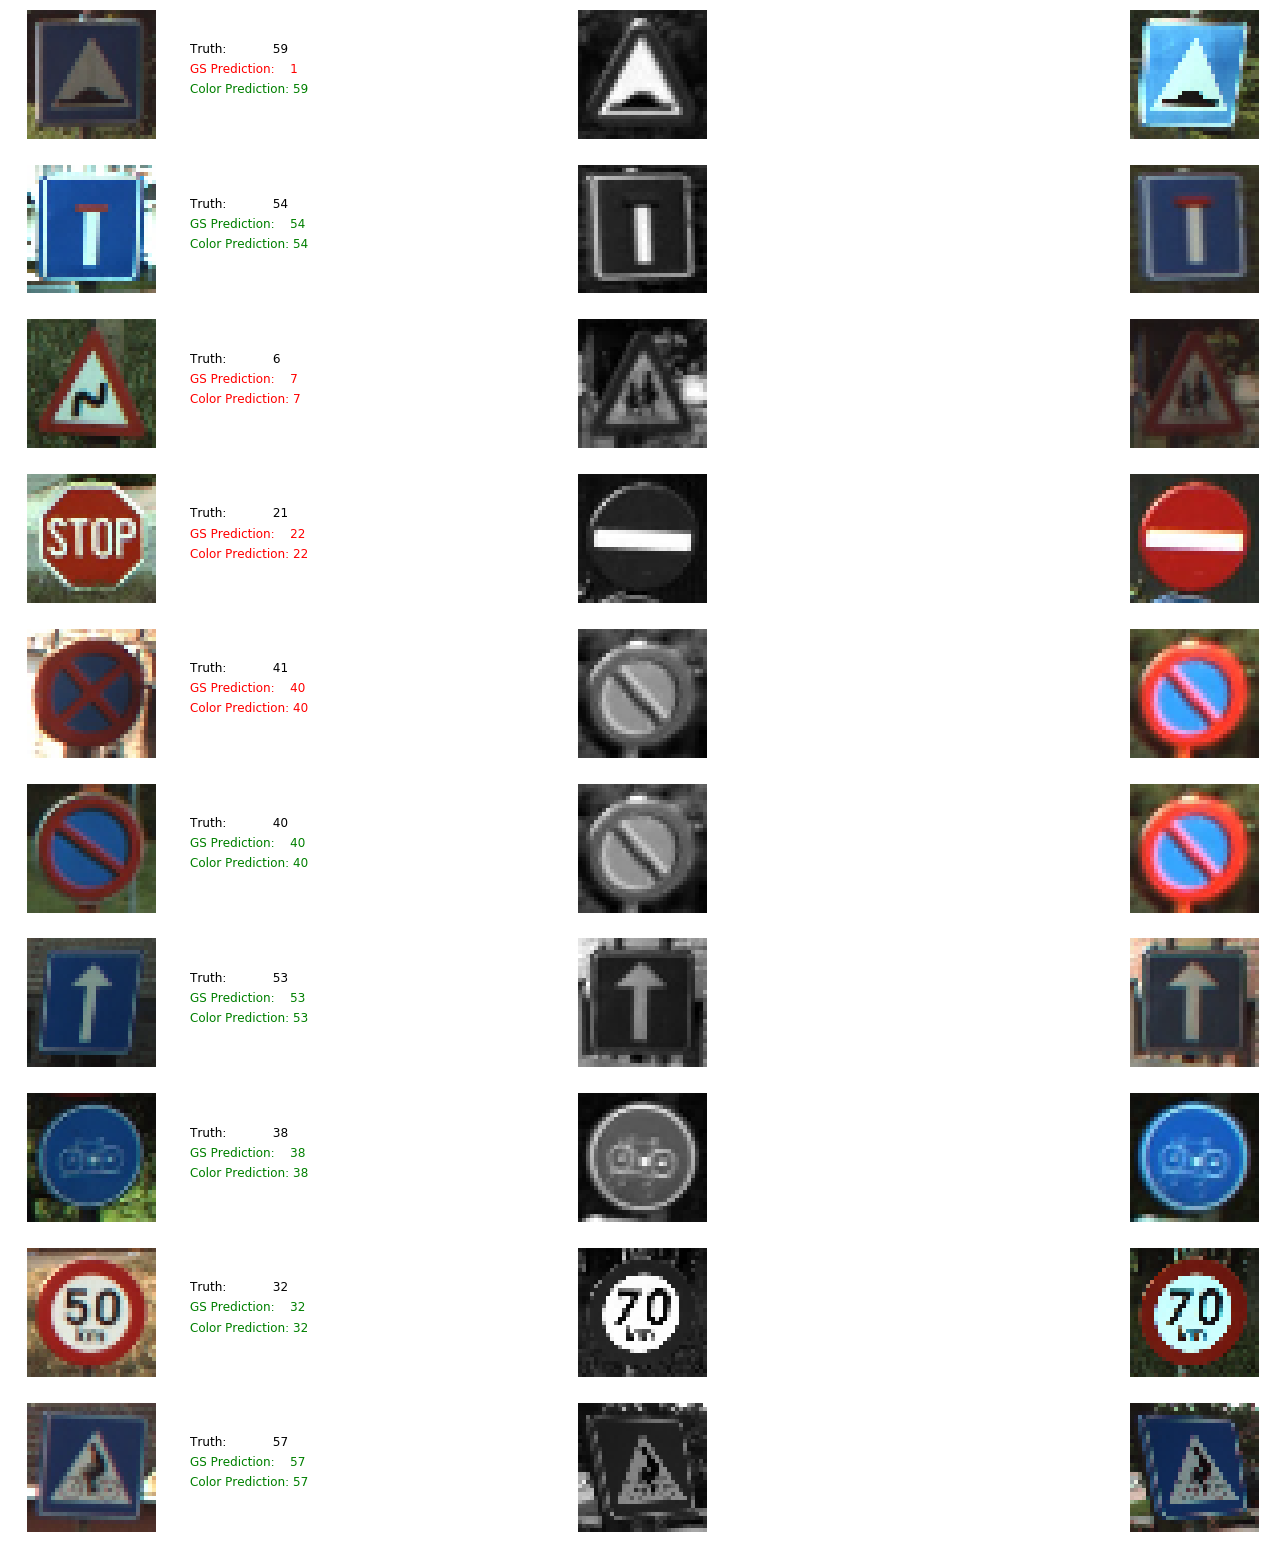

In [24]:
# Display the predictions and the ground truth visually.
#fig = plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(28,28))
j = 1
for i in range(len(sample_images)):
    
    truth = sample_labels[i]
    gprediction = gpredicted[i]
    cprediction = cpredicted[i]
    
    predicted_gimage = simagesg[labels.index(gprediction)]
    predicted_cimage = simages[labels.index(cprediction)]

    plt.subplot(10, 3, j)
    plt.axis('off')
    plt.text(40, 10, "Truth:            {}".format(truth), 
             fontsize=12)
    color='green' if truth == gprediction else 'red'
    plt.text(40, 15, "GS Prediction:    {}".format(gprediction), 
             fontsize=12, color=color)
    color='green' if truth == cprediction else 'red'
    plt.text(40, 20, "Color Prediction: {}".format(cprediction), 
             fontsize=12, color=color)
    plt.imshow(sample_cimages[i])

    j += 1
    
    plt.subplot(10, 3, j)
    plt.axis('off')
    plt.imshow(predicted_gimage, cmap="gray")

    j += 1

    plt.subplot(10, 3, j)
    plt.axis('off')
    plt.imshow(predicted_cimage)

    j += 1
    
# Show the plot
plt.show()

### Can *features* improve the results?
You will now add various layers to the neural network in a way similar to what is done in deep-learning.

In [25]:
import numpy as np

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=62)

# Convert images to numpy arrays
data = np.array(simages)

data.shape

(4575, 32, 32, 3)

In [39]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

fmodel = Sequential()

# Convolutional neural network to extract features
fmodel.add(Conv2D(32, (3, 3), input_shape=data.shape[1:], activation='relu'))
fmodel.add(MaxPooling2D(pool_size=(2, 2)))

fmodel.add(Conv2D(32, (3, 3), activation='relu'))
fmodel.add(MaxPooling2D(pool_size=(2, 2)))

fmodel.add(Conv2D(32, (3, 3), activation='relu'))
fmodel.add(MaxPooling2D(pool_size=(2, 2)))

# Converts our 3D feature maps to 1D feature vectors
fmodel.add(Flatten())

# Classifier network
fmodel.add(Dense(62, activation='relu'))
fmodel.add(Dropout(0.5))
fmodel.add(Dense(62, activation='softmax'))

### Train the model

In [40]:
# Multi-class classification problem
fmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [41]:
# Train the model, iterating on the data in batches of 32 samples
fmodel.fit(data, one_hot_labels, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
4575/4575 [==============================] - 7s - loss: 3.5843 - acc: 0.1447     
Epoch 2/10
4575/4575 [==============================] - 6s - loss: 2.4216 - acc: 0.4129     
Epoch 3/10
4575/4575 [==============================] - 6s - loss: 1.7361 - acc: 0.5604     
Epoch 4/10
4575/4575 [==============================] - 6s - loss: 1.3457 - acc: 0.6442     
Epoch 5/10
4575/4575 [==============================] - 6s - loss: 1.0686 - acc: 0.7110     
Epoch 6/10
4575/4575 [==============================] - 6s - loss: 0.9015 - acc: 0.7554     
Epoch 7/10
4575/4575 [==============================] - 6s - loss: 0.7763 - acc: 0.7779     
Epoch 8/10
4575/4575 [==============================] - 7s - loss: 0.6715 - acc: 0.8055     
Epoch 9/10
4575/4575 [==============================] - 5s - loss: 0.5936 - acc: 0.8293     
Epoch 10/10
4575/4575 [==============================] - 6s - loss: 0.5517 - acc: 0.8466     


### Evaluate performance on some samples

In [44]:
sample_indexes = random.sample(range(len(simages)), 10)
sample_gimages = np.array([simagesg[i] for i in sample_indexes])
sample_cimages = np.array([simages[i] for i in sample_indexes])
sample_labels = np.array([labels[i] for i in sample_indexes])

# Run the "correct_pred" operation
gpredicted = gmodel.predict_classes(sample_gimages)
cpredicted = cmodel.predict_classes(sample_cimages)
fpredicted = fmodel.predict_classes(sample_cimages)

gerror, = np.nonzero(sample_labels - gpredicted)
cerror, = np.nonzero(sample_labels - cpredicted)
ferror, = np.nonzero(sample_labels - fpredicted)

gaccuracy = 100*(1-gerror.size/N)
caccuracy = 100*(1-cerror.size/N)
faccuracy = 100*(1-ferror.size/N)
    
# Print the real and predicted labels
print("Truth:", sample_labels)
print("GS:   ", gpredicted, "accuracy = {}%".format(gaccuracy))
print("Color:", cpredicted, "accuracy = {}%".format(caccuracy))
print("DL:   ", fpredicted, "accuracy = {}%".format(faccuracy))

10/10 [==============================] - 0s
Truth: [32 39 41 38 21 28 18 19 19 12]
GS:    [32 39 40 38 38 28 18 19 19 18] accuracy = 70.0%
Color: [32 38 40 38 21 28  7 19 19  7] accuracy = 60.0%
DL:    [32 39 41 38 21 28 18 19 19 12] accuracy = 100.0%


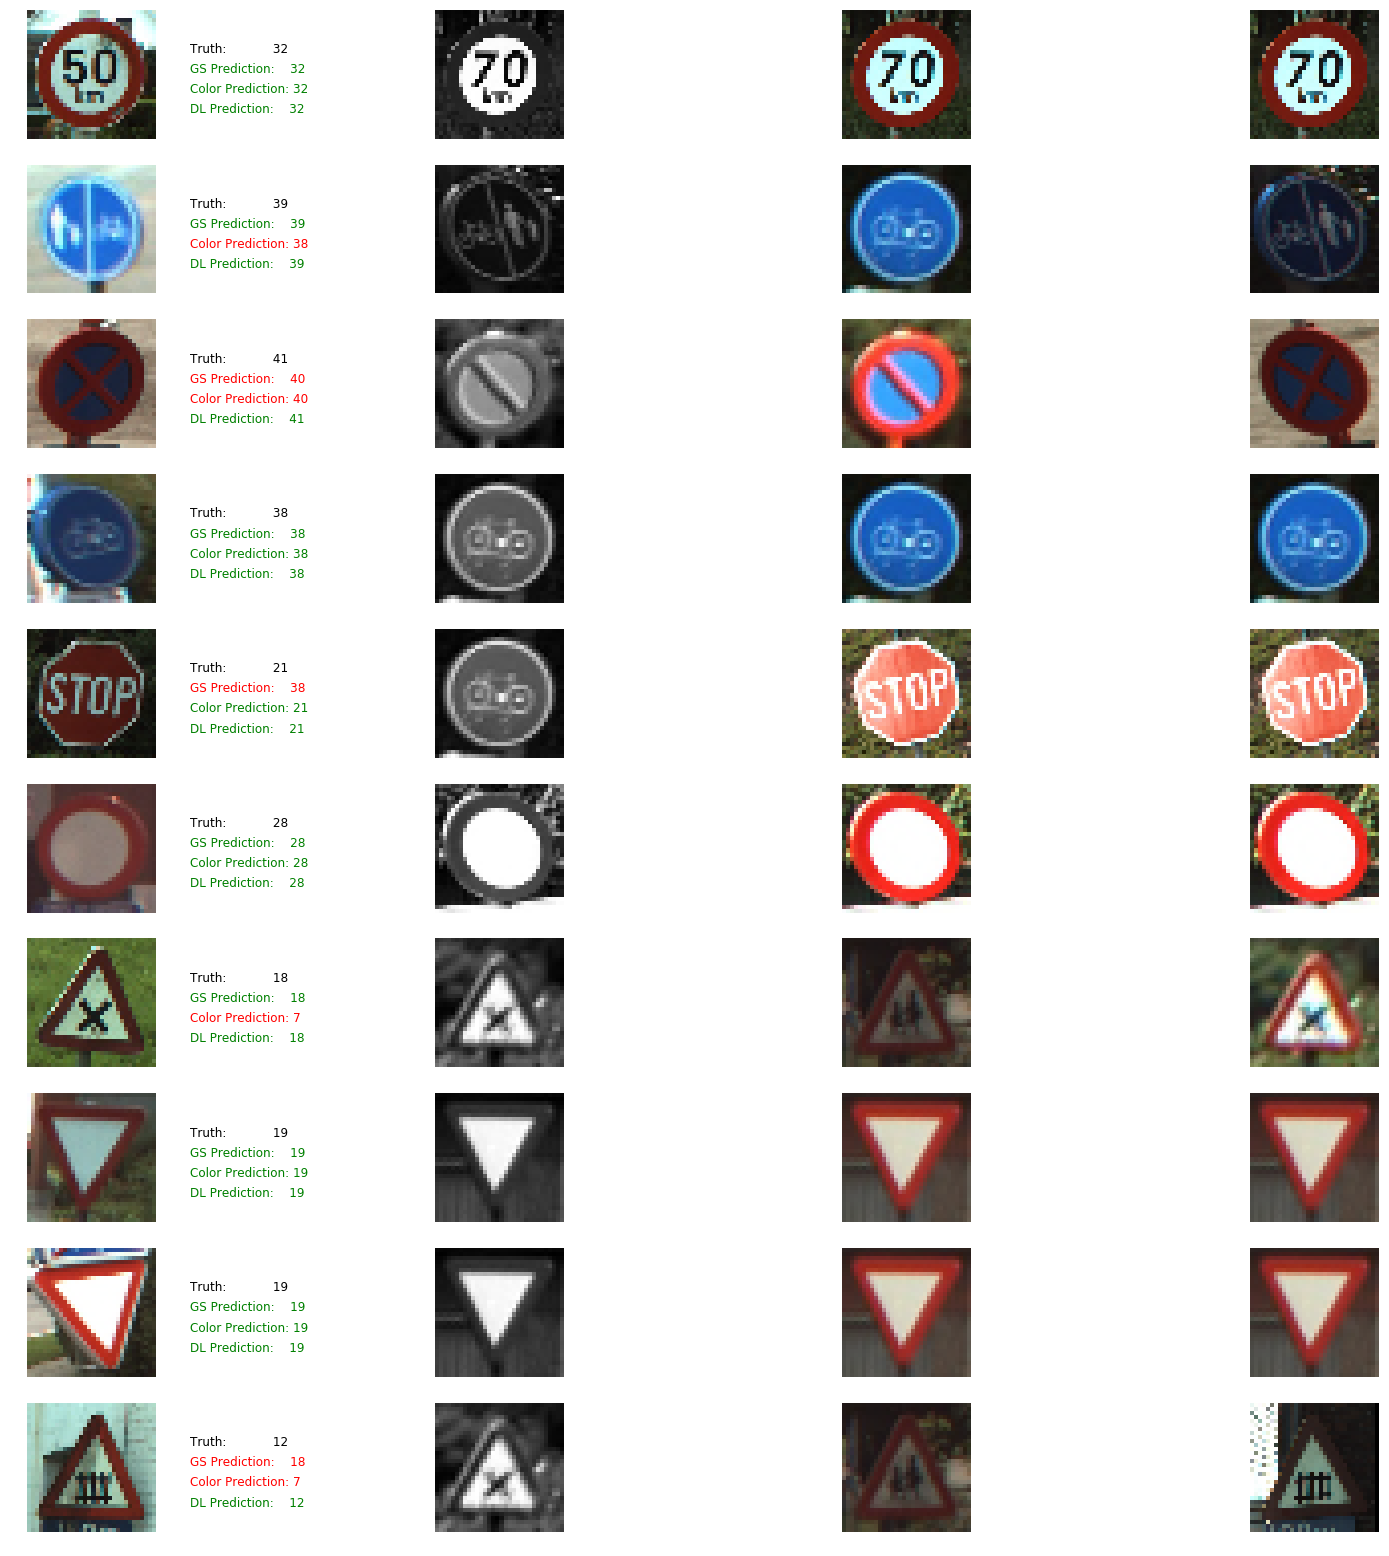

In [46]:
# Display the predictions and the ground truth visually.
#fig = plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(28,28))
j = 1
for i in range(len(sample_images)):
    
    truth = sample_labels[i]
    gprediction = gpredicted[i]
    cprediction = cpredicted[i]
    fprediction = fpredicted[i]
    
    predicted_gimage = simagesg[labels.index(gprediction)]
    predicted_cimage = simages[labels.index(cprediction)]
    predicted_fimage = simages[labels.index(fprediction)]

    plt.subplot(10, 4, j)
    plt.axis('off')
    plt.text(40, 10, "Truth:            {}".format(truth), 
             fontsize=12)
    color='green' if truth == gprediction else 'red'
    plt.text(40, 15, "GS Prediction:    {}".format(gprediction), 
             fontsize=12, color=color)
    color='green' if truth == cprediction else 'red'
    plt.text(40, 20, "Color Prediction: {}".format(cprediction), 
             fontsize=12, color=color)
    color='green' if truth == fprediction else 'red'
    plt.text(40, 25, "DL Prediction:    {}".format(fprediction), 
             fontsize=12, color=color)
    plt.imshow(sample_cimages[i])

    j += 1
    
    plt.subplot(10, 4, j)
    plt.axis('off')
    plt.imshow(predicted_gimage, cmap="gray")

    j += 1

    plt.subplot(10, 4, j)
    plt.axis('off')
    plt.imshow(predicted_cimage)

    j += 1

    plt.subplot(10, 4, j)
    plt.axis('off')
    plt.imshow(predicted_fimage)

    j += 1
    
# Show the plot
plt.show()

The following code provides a crude visualization of what is happening after the first convolutional layer is processed.

You can change the index `k` to pick a different layer you would like to visualize.

In [199]:
from keras.models import Model

k = 1
intermediate_layer_model = Model(inputs=fmodel.input,
                                 outputs=fmodel.layers[k].output)
intermediate_output = intermediate_layer_model.predict(sample_cimages)
print(intermediate_output.shape)

(10, 15, 15, 32)


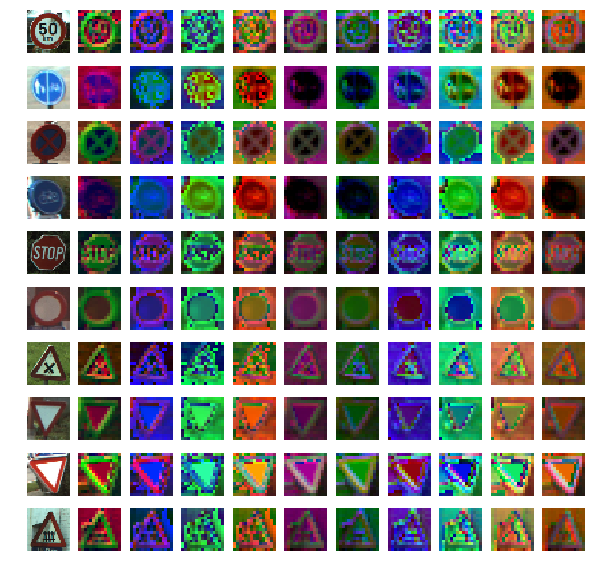

In [200]:
import math
M = math.floor(intermediate_output.shape[-1]/3)
N = len(sample_cimages)
#print('M = {}, N = {}'.format(M,N))

fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_cimages):
    plt.subplot(N,M+1,i*(M+1)+1)
    plt.imshow(img)
    plt.axis('off')
    for j in range(M):
        # print('i = {}, j = {}, i*(M+1)+j+2 = {}'.format(i,j,i*(M+1)+j+2))
        plt.subplot(N,M+1,i*(M+1)+j+2)
        plt.imshow(intermediate_output[i,:,:,j:j+3])
        plt.axis('off')
plt.show()